# Codigo

In [ ]:
from IPython.display import clear_output
import time
import gym
from gym import spaces
import numpy as np
import random
from tqdm import tqdm
import matplotlib.pyplot as plt


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
class Game2048Env(gym.Env):
  def __init__(self):
    super(Game2048Env, self).__init__()

    # Define a ação como uma discreta de 0 a 3 representando os movimentos cima, baixo, esquerda, direita
    self.action_space = spaces.Discrete(4)

    # Define a observação como uma grade 4x4 com valores dos blocos
    self.observation_space = spaces.Box(low=0, high=np.inf, shape=(4, 4), dtype=int)

    self.reset()

  def reset(self):
    # Inicializa o tabuleiro com zeros
    self.board = np.zeros((4, 4), dtype=int)
    self.score = 0
    self.add_new_tile()
    return self.board

  def move(self, action):
      if action == 0:  # Cima
          self.move_tiles(-1, 0)
      elif action == 1:  # Baixo
          self.move_tiles(1, 0)
      elif action == 2:  # Esquerda
          self.move_tiles(0, -1)
      elif action == 3:  # Direita
          self.move_tiles(0, 1)

  def move_tiles(self, delta_row, delta_col):

    moved = False  # Variável para verificar se houve algum movimento

    for row in range(4):
      for col in range(4):
        if self.board[row][col] != 0:
          r, c = row, col
          while 0 <= r + delta_row < 4 and 0 <= c + delta_col < 4 and \
              (self.board[r + delta_row][c + delta_col] == 0 or \
              self.board[r + delta_row][c + delta_col] == self.board[row][col]):
            r += delta_row
            c += delta_col
          if r != row or c != col:
            if self.board[r][c] == self.board[row][col]:
                self.board[r][c] *= 2
            else:
                self.board[r][c] = self.board[row][col]
            self.board[row][col] = 0
          moved = True


  def calculate_reward(self, prev_board):
      # Inicializa a recompensa como 0
    reward = 0

    # Calcula a diferença entre o tabuleiro atual e o tabuleiro anterior
    diff_board = self.board - prev_board

    # Verifica se houve alguma combinação de blocos
    if np.any(diff_board > 0):
      reward += np.sum(diff_board[diff_board > 0])  # recompensa pela combinação de blocos

    # Verifica se o bloco 2048 foi formado
    if 2048 in self.board:
      reward += 2048  # recompensa pela formação do bloco 2048

    # Retorna a recompensa calculada
    return reward

  def is_game_over(self):
    # Verifica se há um bloco com o valor 2048 no tabuleiro
    for row in self.board:
      if 2048 in row:
          #print('ganhou')
          return True

    # Verifica se não há mais movimentos possíveis
    for i in range(4):
      for j in range(4):
        # Se houver um bloco vazio, o jogo ainda não acabou
        if self.board[i][j] == 0:
          return False
        # Verifica se existem movimentos possíveis nas direções cima, baixo, esquerda, direita
        if (i < 3 and self.board[i][j] == self.board[i + 1][j]) or (j < 3 and self.board[i][j] == self.board[i][j + 1]):
          return False
         # Se nenhum dos casos acima ocorrer, o jogo acabou
    #print('perdeu')
    return True

  def step(self, action):
    prev_board = np.copy(self.board)  # copia o tabuleiro antes de executar a ação

    # Executa a ação (move os blocos)
    self.move(action)

    # Verifica se houve alguma mudança no tabuleiro após o movimento
    moved = not np.array_equal(self.board, prev_board)

    # Adiciona um novo bloco se houve um movimento
    if moved:
        self.add_new_tile()

    # Calcula a recompensa
    reward = self.calculate_reward(prev_board)

    # Verifica se o jogo terminou
    done = self.is_game_over()

    # Retorna a observação, a recompensa, e se o jogo terminou
    return self.board, reward, done, {}

  def add_new_tile(self):

    # Encontre todas as posições vazias no tabuleiro
    empty_positions = [(i, j) for i in range(4) for j in range(4) if self.board[i][j] == 0]

    # Verifique se existem posições vazias
    if len(empty_positions) > 0:
      # Escolha aleatoriamente uma posição vazia
      new_tile_position = np.random.choice(len(empty_positions))

      # Escolha aleatoriamente o valor do novo bloco (2 com probabilidade 0.9, 4 com probabilidade 0.1)
      new_tile_value = np.random.choice([2, 4], p=[0.9, 0.1])

      # Adicione o novo bloco ao tabuleiro na posição escolhida
      i, j = empty_positions[new_tile_position]
      self.board[i][j] = new_tile_value

      # Verifica se houve fusão de blocos, ou seja, se a posição do novo bloco estava vazia anteriormente
      if len(empty_positions) > 1:
        return True
      else:
        return False

  def render(self, mode='human'):
    for row in self.board:
        print("+" + "-"*7 + "+" + "-"*7 + "+" + "-"*7 + "+" + "-"*7 + "+")
        print("|{:^7}|{:^7}|{:^7}|{:^7}|".format(*[num if num != 0 else '' for num in row]))
    print("+" + "-"*7 + "+" + "-"*7 + "+" + "-"*7 + "+" + "-"*7 + "+")

env= Game2048Env()

In [ ]:
print("Action Space {}".format(env.action_space.n))
print("State Space {}".format(env.observation_space))

Action Space 4
State Space Box(0, 9223372036854775805, (4, 4), int64)


In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(16, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 4)  # 4 ações possíveis

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = NeuralNetwork()

In [ ]:
def board_to_vector(board):
  return torch.FloatTensor(board.flatten())

# Função para selecionar a melhor ação de acordo com os valores Q
def select_action(q_values):
  return torch.argmax(q_values).item()

In [ ]:
# Inicializa o modelo
model = NeuralNetwork()

# Definindo a função de perda e o otimizador
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
def totensor(obs,model):
  input_tensor = board_to_vector(obs)
  # Passa o tensor pela rede neural
  output_tensor = model(input_tensor)
  return output_tensor

In [ ]:
b = board_to_vector(obs)
b, select_action(b)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0.]),
 tensor(13))

In [ ]:
totensor(obs,model)

tensor([-0.0348,  0.0618,  0.0520, -0.0106], grad_fn=<ViewBackward0>)

In [ ]:
def Q_target(reward,gamma,model,next_obs):
  return reward + gamma * torch.max(model(torch.tensor(next_obs, dtype=torch.float32))).item()

In [ ]:
def select_action(q_values, epsilon):
    num_actions = len(q_values)

    if random.random() < epsilon:
        action = random.randrange(num_actions)  # Escolhe uma ação aleatória
    else:
        action = torch.argmax(q_values).item()  # Escolhe a melhor ação

    return action

In [ ]:
recompensas_finais = []
losses = []
num_games = 10000
gamma = 0.9
learningrate = 0.001
initial_epsilon = 1.0
min_epsilon = 0.1
decay_rate = 0.001
epsilon = initial_epsilon

for _ in tqdm(range(num_games), desc="Treinando"):

  obs = env.reset()
  total_reward = 0

  # Loop principal
  while True:

    epsilon = max(min_epsilon, epsilon - decay_rate)
    # Converta a observação para um tensor torch
    obs_tensor = board_to_vector(obs)

    # Obtenha os valores Q previstos pela rede neural
    q_values = model(obs_tensor)

    # Escolha a ação com maior valor Q
    action = select_action(q_values, epsilon)

    next_obs, reward, done, _ = env.step(action)

    next_obs = board_to_vector(next_obs)

    # Código para calcular o Q-target
    with torch.no_grad():
      q_target = Q_target(reward,gamma,model,next_obs)

    # Atualize o valor Q para a ação escolhida usando o Q-target
    q_values[action] = q_target

    # Calcule a perda
    loss = criterion(q_values, q_values)

    # Realize o backpropagation e atualize os parâmetros do modelo
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Atualize a observação atual para a próxima observação
    total_reward += reward
    obs = next_obs

    if done:
        recompensas_finais.append(total_reward)
        losses.append(loss.item())
        break

print("Treinamento concluído!")
# Calcular métricas finais
recompensa_media_final = sum(recompensas_finais) / len(recompensas_finais)
recompensa_maxima = max(recompensas_finais)
loss_medio = sum(losses) / len(losses)
num_vitorias = sum(1 for reward in recompensas_finais if reward >= 2048)
num_derrotas = len(recompensas_finais) - num_vitorias

print(f"Recompensa final média: {recompensa_media_final}")
print(f"Recompensa máxima: {recompensa_maxima}")
print(f"Loss médio: {loss_medio}")
print(f"Número de vitórias: {num_vitorias}")
print(f"Número de derrotas: {num_derrotas}")

Treinando:   0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-10-f9b5d548dcec>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return reward + gamma * torch.max(model(torch.tensor(next_obs, dtype=torch.float32))).item()
Treinando:  22%|██▏       | 2187/10000 [30:00<1:58:45,  1.10it/s]

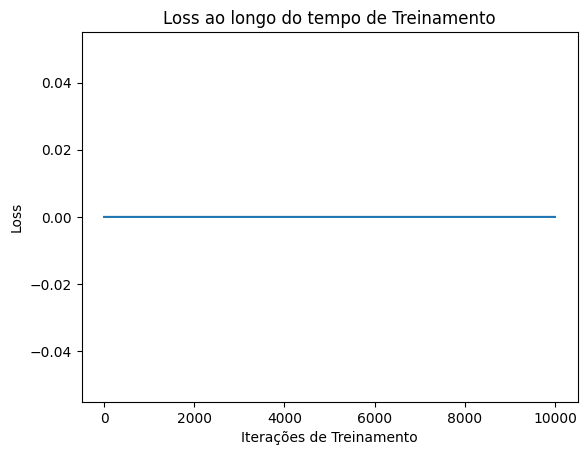

In [ ]:
# Plotando a perda ao longo do tempo
plt.plot(losses)
plt.xlabel('Iterações de Treinamento')
plt.ylabel('Loss')
plt.title('Loss ao longo do tempo de Treinamento')
plt.show()

# Testes de atributos

In [ ]:
obs_tensor=  board_to_vector(obs)
q_values = model(obs_tensor)
print(q_values)
action = torch.argmax(q_values).item()
print(action)
next_obs, reward, done, _ = env.step(action)

tensor([ 0.1263,  0.3559,  0.3743, -0.0695], grad_fn=<ViewBackward0>)
2


In [ ]:
torch.max(model(board_to_vector(next_obs))).item()

0.32829540967941284

In [ ]:
b = torch.max(model(board_to_vector(next_obs))).item()
c = model(board_to_vector(next_obs))
q_target = reward + gamma * b
q_values, b, c, q_target

(tensor([ 0.1263,  0.3559,  0.3743, -0.0695], grad_fn=<ViewBackward0>),
 0.32829540967941284,
 tensor([ 0.1012,  0.3283,  0.2252, -0.1801], grad_fn=<ViewBackward0>),
 10.29546586871147)

In [ ]:
q_values[action] = q_target

q_values

tensor([ 0.1263,  0.3559, 10.2955, -0.0695], grad_fn=<AsStridedBackward0>)

# Jogando

In [ ]:
obs = env.reset()
print(obs)

while True:
  action = int(input("Escolha sua ação (0 para up, 1 para down,2 para left,3 para right): "))
  if action == 99:
    break
  next_obs, reward, done, _ = env.step(action)
  obs = next_obs
  print(obs)
  if done == True:
    break

(4, 4)


KeyboardInterrupt: Interrupted by user